In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
import sqlite3

In [13]:
# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price INTEGER
    )
''')

# Sample data
sample_data = [
    ("Laptop", 100, 30000000),
    ("Headphones", 57, 500000),
    ("Smartphones", 87, 2500000),
    ("Speakers", 39, 80000),
    ("Tablets", 21, 500000),
]

# Insert data using parameterized query
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()





In [14]:
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

In [15]:
# (Assumes a 'sales' table exists)
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""


In [16]:

# Execute query and load results into DataFrame
df = pd.read_sql_query(query, conn)


In [17]:
print("Sales Summary:")
print(df)


Sales Summary:
       product  total_qty     revenue
0   Headphones         57    28500000
1       Laptop        100  3000000000
2  Smartphones         87   217500000
3     Speakers         39     3120000
4      Tablets         21    10500000


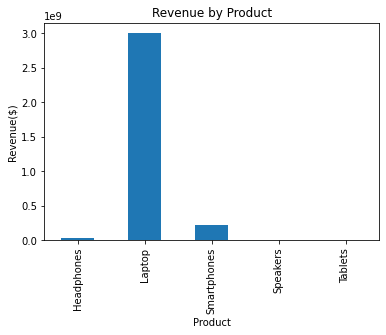

In [19]:
df.plot(kind="bar",x='product',y='revenue',legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue($)")
plt.xlabel("Product")
plt.show()

In [20]:
plt.savefig("sales_chart.png")

<Figure size 432x288 with 0 Axes>

In [22]:
q="""
select
product,
AVG(price) AS avg_price
FROM sales
GROUP BY product
"""


In [23]:
data = pd.read_sql_query(q, conn)

In [24]:
print(data)

       product   avg_price
0   Headphones    500000.0
1       Laptop  30000000.0
2  Smartphones   2500000.0
3     Speakers     80000.0
4      Tablets    500000.0


In [25]:
top_products = df.sort_values(by='revenue', ascending=False).head(3)
print("Top 3 products by revenue:")
print(top_products)


Top 3 products by revenue:
       product  total_qty     revenue
1       Laptop        100  3000000000
2  Smartphones         87   217500000
0   Headphones         57    28500000


In [27]:
df.to_csv("sales_summary.csv", index=False)
